### Wczytanie danych z zbioru Indian dataset i wstępna ich analiza

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [22]:
path = r"C:\Users\woj19\Desktop\Studia\SystemySztucznejInteligencji\dane\diabetes.csv"
df = pd.read_csv(path)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Wstępne czyszczenie danych

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Jak tutaj gdzieś nam się pojawi string to znaczy że coś jest nie tak, string jest nad int i float więc nawet jeden sprawi że Dtype będzie string

In [25]:
df.isnull() #sprawdzamy czy są jakieś braki danych

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum() #sprawdzamy ile jest braków danych

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df.describe() #Można wstępnie sprawdzić czy dane są git

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


W pythonie mamy system metryczny w calac XD. Więc jak tworzymy plt to figsize jest w calach

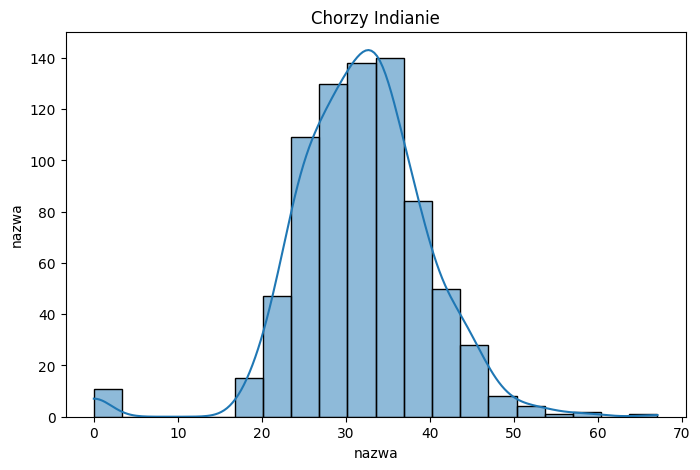

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title("Chorzy Indianie")
plt.ylabel("nazwa")
plt.xlabel("nazwa")
plt.show()

Na podstawie wykresu widać coś tam coś

In [29]:
df.corr() #sprawdzamy korelację

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


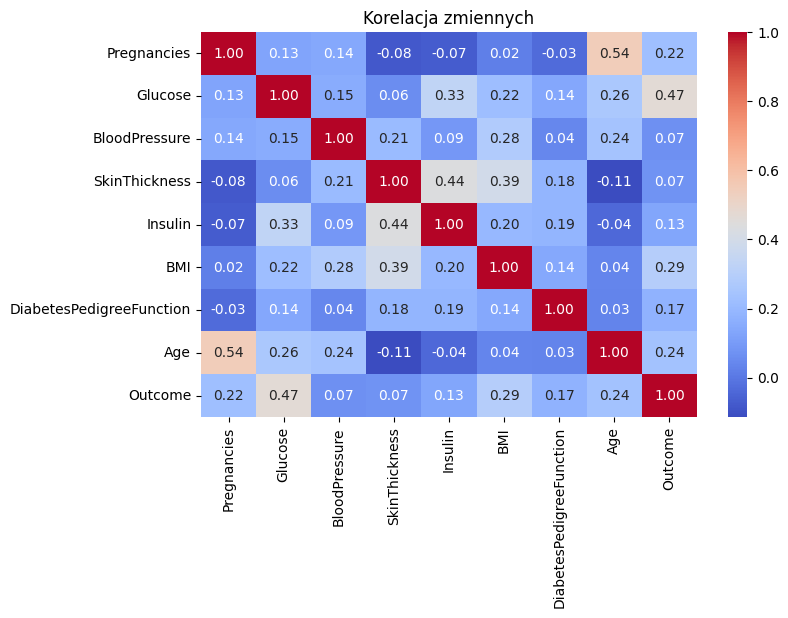

In [30]:
corr_matrix = df.corr() # Tutaj będzie o wiele lepiej widać korelację
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # cmap można sobie poatrzeć w necie jakie są dostępne
plt.title("Korelacja zmiennych")
plt.show()

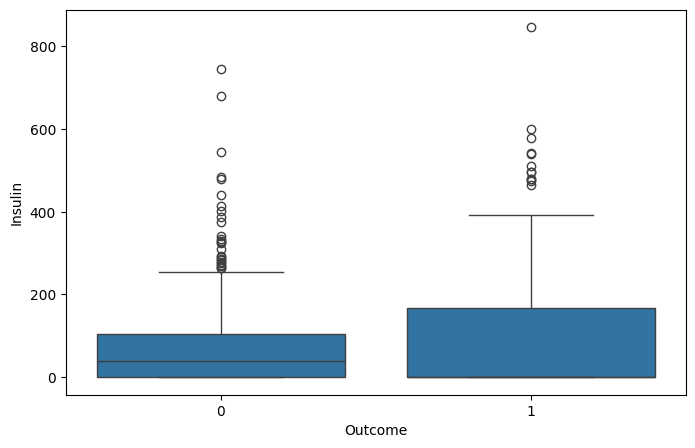

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.show()

Ta linia w środku boxa to  średnia, a ten prostokąt to jakie wartości przyjmują, w tym po lewo nie widać bo jest na samym dole
 <br>TO ZADANIE DO TEJ PORY BĘDZIE NA KOLOKWIUM!

In [32]:
df.iloc[4] #wyświetla 4 wiersz

Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     168.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1) # drop usuwa kolumnę Outcome, a axis=1 oznacza, że usuwamy kolumnę (albo to samo co df.iloc[:, :-1])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) #dzielimy dane na zbiór treningowy i testowy, jak mamy
#dużo danych to nawet 90/10 

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\woj19\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

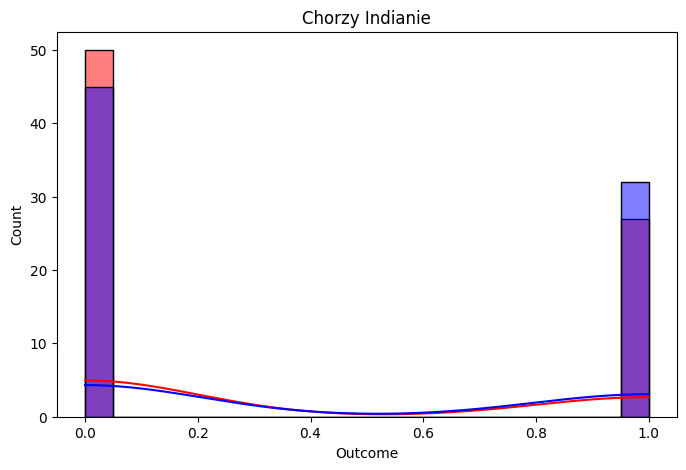

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(y_test, bins=20, kde=True, color='red', label='Test')
sns.histplot(y_pred, bins=20, kde=True, color='blue', label='Pred')
plt.title("Chorzy Indianie")
plt.show()

In [37]:
df = pd.DataFrame(y_train)
df["Outcome"]

396    0
528    0
10     0
192    1
448    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 691, dtype: int64

In [38]:
import random

class knn:
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = pd.DataFrame(X_train)
        self.y_train = pd.DataFrame(y_train, columns=["label"])

    def minkowski_distance(self, vector1, vector2, p=2):
        diff = np.array(vector1) - np.array(vector2)
        return np.sum(np.abs(diff) ** p) ** (1/p)
    
    def classify(self, vector):
        dist = []
        for i in range(len(self.X_train)):
            minko = self.minkowski_distance((self.X_train.iloc[i]), vector)
            dist.append(minko)
        df = self.y_train.copy()
        df["dist"] = dist
        df_sorted = df.sort_values(by="dist").head(self.k)
        somsiady = df_sorted["label"]
        if somsiady.sum()*2 > self.k:
            return 1
        elif somsiady.sum()*2 < self.k:
            return 0
        elif somsiady.sum()*2 == self.k:
            return random.choice([0,1])
        
            

        

In [ ]:
knn_cc=knn(2, X_train, y_train)
counter = 0
pd.DataFrame(X_test)
for i in range(len(y_test)):
    res = knn_cc.classify(X_test.iloc[i])
    if res == y_test.iloc[i]:
        counter += 1

print(len(y_test))
print(counter)
print(f"Accuracy - {round((counter/len(y_test))*100,2)}%")

77
50
Accuracy - 64.94%


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Załóżmy, że X_train, y_train, X_test, y_test są już przygotowane
model = KNeighborsClassifier(n_neighbors=2)  # Możesz eksperymentować z wartością k
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy -", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

Accuracy - 74.03 %
